In [32]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, ks_2samp, mannwhitneyu
import pandas as pd

Figure S1

In [33]:
df_300 = pd.read_csv("./data_files/TC_outer_inner_evolution_300K.csv")

precip_mean_inner_300 = df_300.precip_inner_v*4. #convert from mm/15 minutes to mm/hr
precip_mean_outer_300 = df_300.precip_outer_v*4.
precip_max_inner_300 = df_300.precip_max_inner_v*4.
precip_max_outer_300 = df_300.precip_max_outer_v*4.
time_300 = df_300.hours_after_init
vmax_2D_300 = df_300.vmax_2D

In [34]:
df_300_002 = pd.read_csv("./data_files/TC_outer_inner_evolution_300K_002.csv")

precip_mean_inner_300_002 = df_300_002.precip_inner_v*4.
precip_mean_outer_300_002 = df_300_002.precip_outer_v*4.
precip_max_inner_300_002 = df_300_002.precip_max_inner_v*4.
precip_max_outer_300_002 = df_300_002.precip_max_outer_v*4.
time_300_002 = df_300_002.hours_after_init
vmax_2D_300_002 = df_300_002.vmax_2D

In [35]:
df_300_003 = pd.read_csv("./data_files/TC_outer_inner_evolution_300K_003.csv")

precip_mean_inner_300_003 = df_300_003.precip_inner_v*4.
precip_mean_outer_300_003 = df_300_003.precip_outer_v*4.
precip_max_inner_300_003 = df_300_003.precip_max_inner_v*4.
precip_max_outer_300_003 = df_300_003.precip_max_outer_v*4.
time_300_003 = df_300_003.hours_after_init
vmax_2D_300_003 = df_300_003.vmax_2D

Text(0.5, 1.0, 'Mean Precipitation')

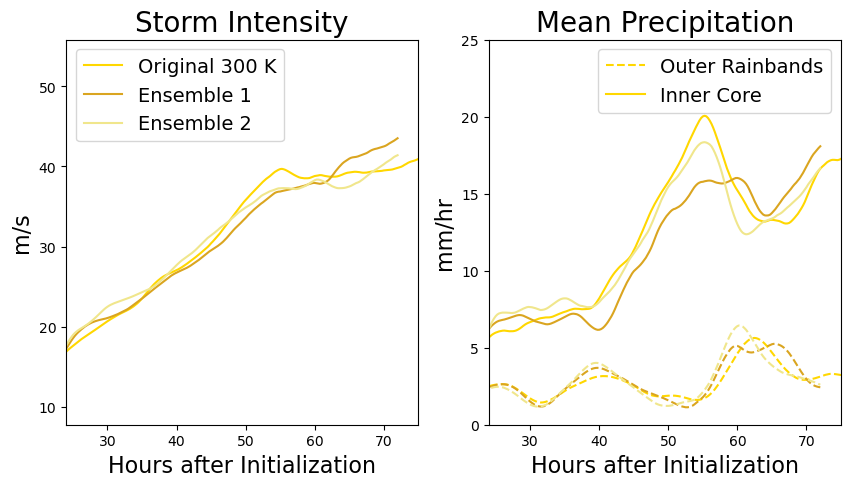

In [36]:
fig1, ax = plt.subplots(1,2,figsize=(10,5))

vmax_300_smoothed = vmax_2D_300.rolling(window=24, win_type = "lanczos").mean()
vmax_300_002_smoothed = vmax_2D_300_002.rolling(window=24, win_type = "lanczos").mean()
vmax_300_003_smoothed = vmax_2D_300_003.rolling(window=24, win_type = "lanczos").mean()

ax[0].plot(time_300,vmax_300_smoothed, c="gold", label="Original 300 K")
ax[0].plot(time_300_002,vmax_300_002_smoothed, c="goldenrod", label="Ensemble 1")
ax[0].plot(time_300_003,vmax_300_003_smoothed, c="khaki", label="Ensemble 2")

ax[0].set_xlim(24,75)
ax[0].legend(fontsize=14)

ax[0].set_ylabel("m/s",fontsize=16)
ax[0].set_xlabel("Hours after Initialization",fontsize=16)
ax[0].set_title("Storm Intensity",fontsize=20)

precip_mean_outer_smoothed_300 = precip_mean_outer_300.rolling(window=24, win_type = "lanczos").mean()
precip_mean_outer_smoothed_300_002 = precip_mean_outer_300_002.rolling(window=24, win_type = "lanczos").mean()
precip_mean_outer_smoothed_300_003 = precip_mean_outer_300_003.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_300 = precip_mean_inner_300.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_300_002 = precip_mean_inner_300_002.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_300_003 = precip_mean_inner_300_003.rolling(window=24, win_type = "lanczos").mean()

ax[1].plot(time_300,precip_mean_outer_smoothed_300, c="gold",linestyle="dashed",label="Outer Rainbands")
ax[1].plot(time_300,precip_mean_inner_smoothed_300, c="gold",label="Inner Core")
ax[1].plot(time_300_002,precip_mean_inner_smoothed_300_002,  c="goldenrod")
ax[1].plot(time_300_002,precip_mean_outer_smoothed_300_002, c="goldenrod",linestyle="dashed")
ax[1].plot(time_300_003,precip_mean_inner_smoothed_300_003,  c="khaki")
ax[1].plot(time_300_003,precip_mean_outer_smoothed_300_003, c="khaki",linestyle="dashed")

ax[1].legend(fontsize=14)

ax[1].set_xlim(24,75)
ax[1].set_ylim(0,25)

ax[1].set_ylabel("mm/hr",fontsize=16)
ax[1].set_xlabel("Hours after Initialization",fontsize=16)

ax[1].set_title("Mean Precipitation",fontsize=20)

In [37]:
print (mannwhitneyu(precip_mean_outer_300[95:288],precip_mean_outer_300_002[95:]))
print (mannwhitneyu(precip_mean_outer_300[95:288],precip_mean_outer_300_003[95:]))
print (mannwhitneyu(precip_mean_outer_300_002[95:],precip_mean_outer_300_003[95:]))

print (mannwhitneyu(precip_mean_inner_300[95:288],precip_mean_inner_300_002[95:]))
print (mannwhitneyu(precip_mean_inner_300[95:288],precip_mean_inner_300_003[95:]))
print (mannwhitneyu(precip_mean_inner_300_002[95:],precip_mean_inner_300_003[95:]))

print (mannwhitneyu(vmax_2D_300[95:288],vmax_2D_300_002[95:]))
print (mannwhitneyu(vmax_2D_300[95:288],vmax_2D_300_003[95:]))
print (mannwhitneyu(vmax_2D_300_002[95:],vmax_2D_300_003[95:]))

MannwhitneyuResult(statistic=18708.0, pvalue=0.9396355773089969)
MannwhitneyuResult(statistic=19042.0, pvalue=0.7036008086575845)
MannwhitneyuResult(statistic=19025.0, pvalue=0.7151459354480898)
MannwhitneyuResult(statistic=19937.0, pvalue=0.23128773759295962)
MannwhitneyuResult(statistic=18775.0, pvalue=0.8911433111506274)
MannwhitneyuResult(statistic=17326.0, pvalue=0.23630426215625888)
MannwhitneyuResult(statistic=18545.0, pvalue=0.9425395441788957)
MannwhitneyuResult(statistic=19281.0, pvalue=0.5494902568671587)
MannwhitneyuResult(statistic=18758.0, pvalue=0.9034160995929531)


Figure S2

In [38]:
df_298 = pd.read_csv("./data_files/TC_outer_inner_evolution_298K.csv")
precip_mean_inner_298_orig = df_298.precip_inner_v*4.
precip_mean_outer_298_orig = df_298.precip_outer_v*4.
time_298 = df_298.hours_after_init
r_inner_v_298 = df_298.rinner_v.values

df_298_router = pd.read_csv("./data_files/TC_outer_inner_evolution_298K_r6outer.csv")
precip_mean_inner_298_router = df_298_router.precip_inner_v*4.
precip_mean_outer_298_router = df_298_router.precip_outer_v*4.

df_298_rinner = pd.read_csv("./data_files/TC_outer_inner_evolution_298K_rmax1.5inner.csv")
precip_mean_inner_298_rinner = df_298_rinner.precip_inner_v*4.
precip_mean_outer_298_rinner = df_298_rinner.precip_outer_v*4.

precip_mean_outer_smoothed_298_orig = precip_mean_outer_298_orig.rolling(window=24, win_type = "lanczos").mean()
precip_mean_outer_smoothed_298_router = precip_mean_outer_298_router.rolling(window=24, win_type = "lanczos").mean()
precip_mean_outer_smoothed_298_rinner = precip_mean_outer_298_rinner.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_298_orig = precip_mean_inner_298_orig.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_298_rinner = precip_mean_inner_298_rinner.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_298_router = precip_mean_inner_298_router.rolling(window=24, win_type = "lanczos").mean()

In [39]:
df_300 = pd.read_csv("./data_files/TC_outer_inner_evolution_300K.csv")
precip_mean_inner_300_orig = df_300.precip_inner_v*4.
precip_mean_outer_300_orig = df_300.precip_outer_v*4.
time_300 = df_300.hours_after_init
r_inner_v_300 = df_300.rinner_v.values

df_300_router = pd.read_csv("./data_files/TC_outer_inner_evolution_300K_r6outer.csv")
precip_mean_inner_300_router = df_300_router.precip_inner_v*4.
precip_mean_outer_300_router = df_300_router.precip_outer_v*4.

df_300_rinner = pd.read_csv("./data_files/TC_outer_inner_evolution_300K_rmax1.5inner.csv")
precip_mean_inner_300_rinner = df_300_rinner.precip_inner_v*4.
precip_mean_outer_300_rinner = df_300_rinner.precip_outer_v*4.

precip_mean_outer_smoothed_300_orig = precip_mean_outer_300_orig.rolling(window=24, win_type = "lanczos").mean()
precip_mean_outer_smoothed_300_router = precip_mean_outer_300_router.rolling(window=24, win_type = "lanczos").mean()
precip_mean_outer_smoothed_300_rinner = precip_mean_outer_300_rinner.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_300_orig = precip_mean_inner_300_orig.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_300_rinner = precip_mean_inner_300_rinner.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_300_router = precip_mean_inner_300_router.rolling(window=24, win_type = "lanczos").mean()

In [40]:
df_302 = pd.read_csv("./data_files/TC_outer_inner_evolution_302K.csv")
precip_mean_inner_302_orig = df_302.precip_inner_v*4.
precip_mean_outer_302_orig = df_302.precip_outer_v*4.
time_302 = df_302.hours_after_init
r_inner_v_302 = df_302.rinner_v.values

df_302_router = pd.read_csv("./data_files/TC_outer_inner_evolution_302K_r6outer.csv")
precip_mean_inner_302_router = df_302_router.precip_inner_v*4.
precip_mean_outer_302_router = df_302_router.precip_outer_v*4.

df_302_rinner = pd.read_csv("./data_files/TC_outer_inner_evolution_302K_rmax1.5inner.csv")
precip_mean_inner_302_rinner = df_302_rinner.precip_inner_v*4.
precip_mean_outer_302_rinner = df_302_rinner.precip_outer_v*4.

precip_mean_outer_smoothed_302_orig = precip_mean_outer_302_orig.rolling(window=24, win_type = "lanczos").mean()
precip_mean_outer_smoothed_302_router = precip_mean_outer_302_router.rolling(window=24, win_type = "lanczos").mean()
precip_mean_outer_smoothed_302_rinner = precip_mean_outer_302_rinner.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_302_orig = precip_mean_inner_302_orig.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_302_rinner = precip_mean_inner_302_rinner.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_302_router = precip_mean_inner_302_router.rolling(window=24, win_type = "lanczos").mean()

In [41]:
df_304 = pd.read_csv("./data_files/TC_outer_inner_evolution_304K.csv")
precip_mean_inner_304_orig = df_304.precip_inner_v*4.
precip_mean_outer_304_orig = df_304.precip_outer_v*4.
time_304 = df_304.hours_after_init
r_inner_v_304 = df_304.rinner_v.values
r_inner_p_304 = df_304.rinner_p.values

df_304_router = pd.read_csv("./data_files/TC_outer_inner_evolution_304K_r6outer.csv")
precip_mean_inner_304_router = df_304_router.precip_inner_v*4.
precip_mean_outer_304_router = df_304_router.precip_outer_v*4.

df_304_rinner = pd.read_csv("./data_files/TC_outer_inner_evolution_304K_rmax1.5inner.csv")
precip_mean_inner_304_rinner = df_304_rinner.precip_inner_v*4.
precip_mean_outer_304_rinner = df_304_rinner.precip_outer_v*4.

precip_mean_outer_smoothed_304_orig = precip_mean_outer_304_orig.rolling(window=24, win_type = "lanczos").mean()
precip_mean_outer_smoothed_304_router = precip_mean_outer_304_router.rolling(window=24, win_type = "lanczos").mean()
precip_mean_outer_smoothed_304_rinner = precip_mean_outer_304_rinner.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_304_orig = precip_mean_inner_304_orig.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_304_rinner = precip_mean_inner_304_rinner.rolling(window=24, win_type = "lanczos").mean()
precip_mean_inner_smoothed_304_router = precip_mean_inner_304_router.rolling(window=24, win_type = "lanczos").mean()


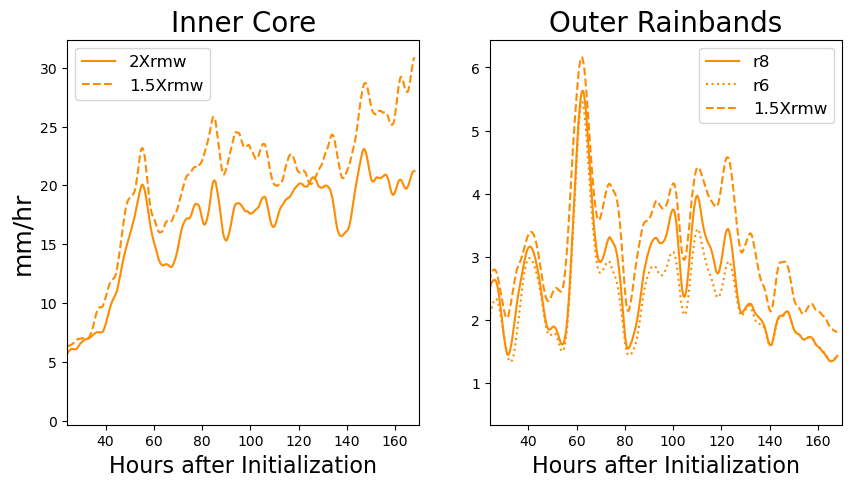

In [42]:
fig2, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(time_300,precip_mean_inner_smoothed_300_orig, c="darkorange", label="2Xrmw")
ax[0].plot(time_300,precip_mean_inner_smoothed_300_rinner,  c="darkorange", linestyle="dashed", label="1.5Xrmw")

ax[0].set_title("Inner Core", fontsize=20)
ax[0].set_ylabel("mm/hr", fontsize=18)
ax[0].set_xlim(24,170)
ax[0].set_xlabel("Hours after Initialization",fontsize=16)

ax[1].plot(time_300,precip_mean_outer_smoothed_300_orig, c="darkorange", label="r8")
ax[1].plot(time_300,precip_mean_outer_smoothed_300_router, c="darkorange", linestyle="dotted",label="r6")
ax[1].plot(time_300,precip_mean_outer_smoothed_300_rinner, c="darkorange", linestyle="dashed",label="1.5Xrmw")

ax[1].set_title("Outer Rainbands", fontsize=20)
ax[1].set_xlim(24,170)
ax[1].set_xlabel("Hours after Initialization",fontsize=16)
ax[1].legend(fontsize=12)
ax[0].legend(fontsize=12)

In [43]:
df_298 = pd.read_csv("./data_files/TC_outer_inner_evolution_298K.csv")
precip_max_inner_298 = df_298.precip_max_inner_v*4.
precip_max_outer_298 = df_298.precip_max_outer_v*4.

In [44]:
df_300 = pd.read_csv("./data_files/TC_outer_inner_evolution_300K.csv")
precip_max_inner_300 = df_300.precip_max_inner_v*4.
precip_max_outer_300 = df_300.precip_max_outer_v*4.

In [45]:
df_302 = pd.read_csv("./data_files/TC_outer_inner_evolution_302K.csv")
precip_max_inner_302 = df_302.precip_max_inner_v*4.
precip_max_outer_302 = df_302.precip_max_outer_v*4.

In [46]:
df_304 = pd.read_csv("./data_files/TC_outer_inner_evolution_304K.csv")
precip_max_inner_304 = df_304.precip_max_inner_v*4.
precip_max_outer_304 = df_304.precip_max_outer_v*4.


Text(0.5, 0, 'Hours after Initialization')

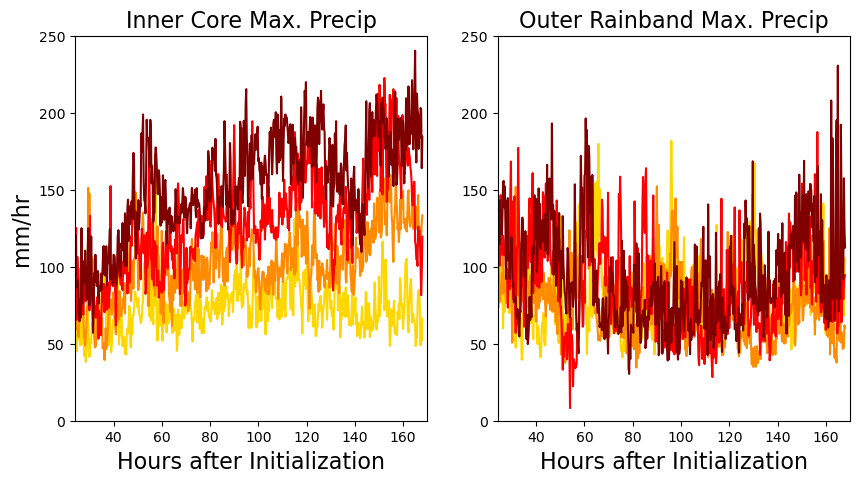

In [47]:
fig1, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(time_298,precip_max_inner_298,c="gold", label="298 K")
ax[0].plot(time_300,precip_max_inner_300,c="darkorange", label="300 K")
ax[0].plot(time_302,precip_max_inner_302,c="red", label="302 K")
ax[0].plot(time_304,precip_max_inner_304,c="maroon", label="304 K")
ax[1].plot(time_298,precip_max_outer_298,c="gold")
ax[1].plot(time_300,precip_max_outer_300,c="darkorange")
ax[1].plot(time_302,precip_max_outer_302,c="red")
ax[1].plot(time_304,precip_max_outer_304,c="maroon")

ax[1].set_xlim(24,170)
ax[0].set_xlim(24,170)
ax[1].set_ylim(0,250)
ax[0].set_ylim(0,250)
ax[0].set_title("Inner Core Max. Precip",fontsize=16)
ax[1].set_title("Outer Rainband Max. Precip",fontsize=16)
ax[0].set_ylabel("mm/hr",fontsize=16)
ax[0].set_xlabel("Hours after Initialization",fontsize=16)
ax[1].set_xlabel("Hours after Initialization",fontsize=16)

Figure S3

In [48]:
f298 = xr.open_dataset('./data_files/storm_mode_frequencies_298K_alltimes.nc') #list the files
DCC_298 = f298.DCC_freq
WCC_298 = f298.WCC_freq
OCC_298 = f298.OCC_freq
DWCC_298 = f298.DWCC_freq
BSR_298 = f298.BSR_freq
f298.close()

In [49]:
f300 = xr.open_dataset('./data_files/storm_mode_frequencies_300K_alltimes.nc') #list the files
DCC_300 = f300.DCC_freq
WCC_300 = f300.WCC_freq
OCC_300 = f300.OCC_freq
DWCC_300 = f300.DWCC_freq
BSR_300 = f300.BSR_freq
f300.close()

In [50]:
f302 = xr.open_dataset('./data_files/storm_mode_frequencies_302K_alltimes.nc') #list the files
DCC_302 = f302.DCC_freq
WCC_302 = f302.WCC_freq
OCC_302 = f302.OCC_freq
DWCC_302 = f302.DWCC_freq
BSR_302 = f302.BSR_freq
f302.close()

In [51]:
f304 = xr.open_dataset('./data_files/storm_mode_frequencies_304K_alltimes.nc') #list the files
DCC_304 = f304.DCC_freq
WCC_304 = f304.WCC_freq
OCC_304 = f304.OCC_freq
DWCC_304 = f304.DWCC_freq
BSR_304 = f304.BSR_freq
f304.close()

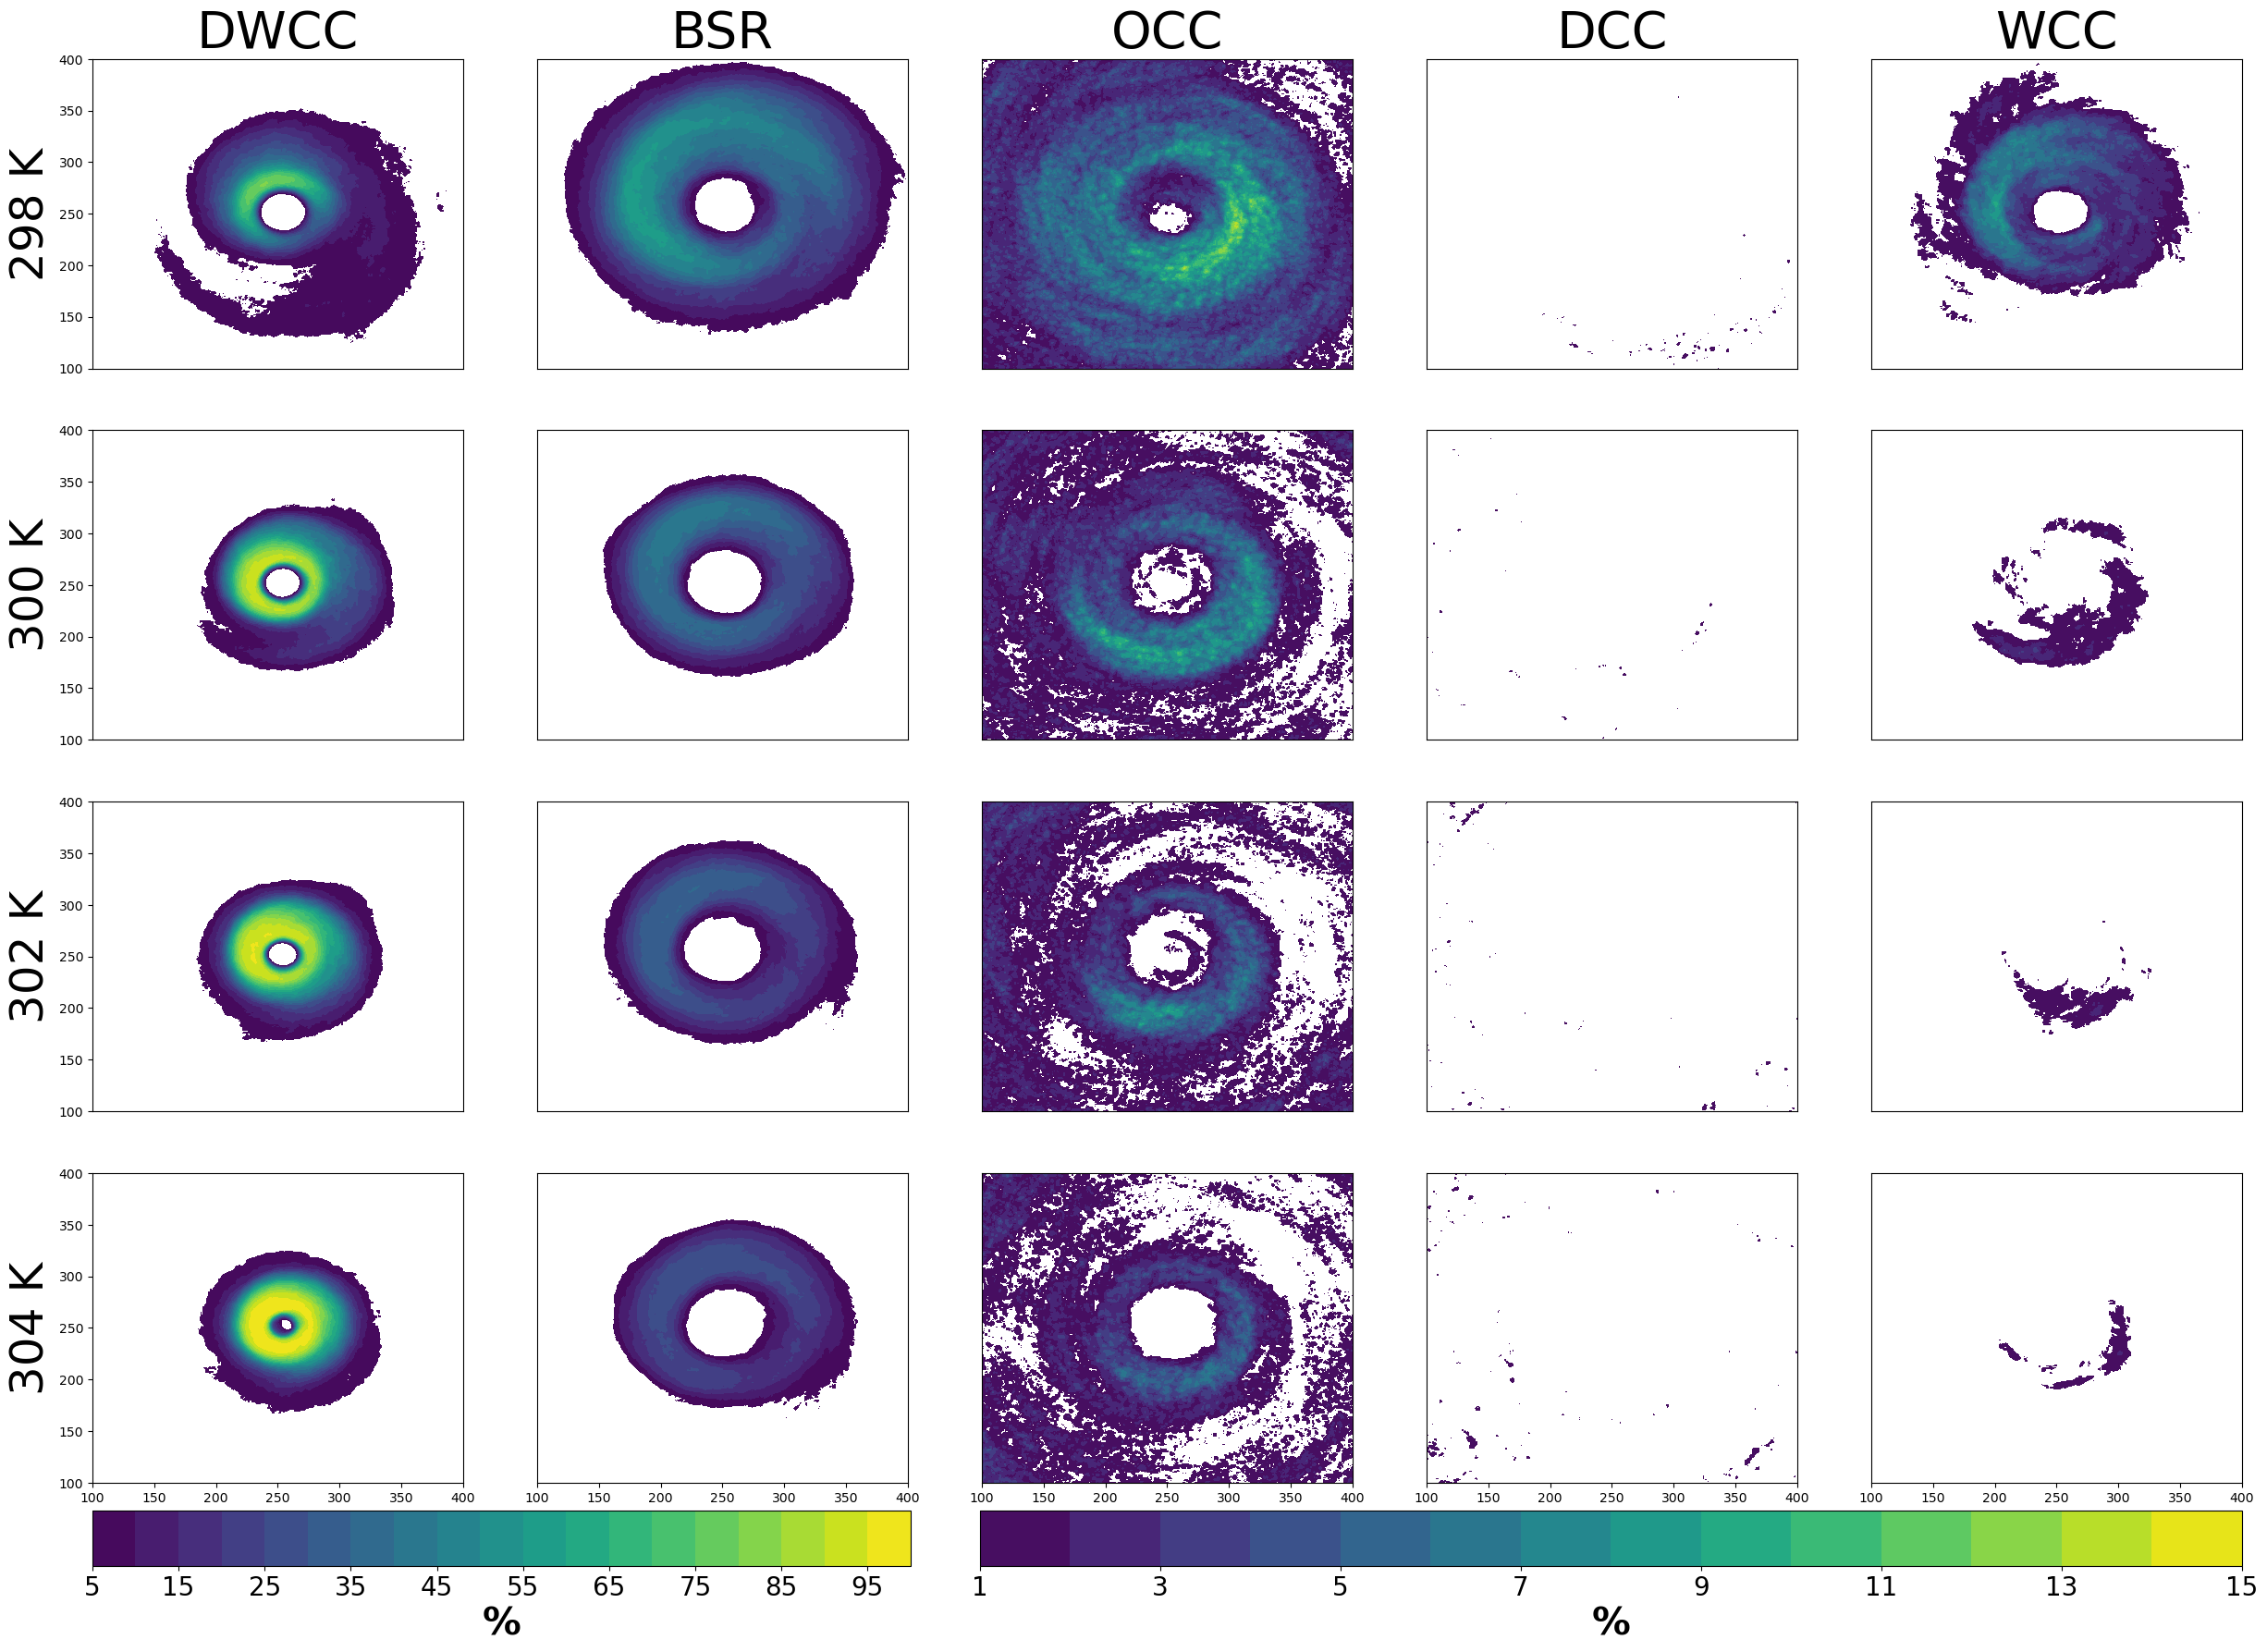

In [52]:
fig3, ax = plt.subplots(4,5,figsize=(30,20))

dwcc = ax[0,0].contourf(DWCC_298,levels=np.arange(5,105,5))
ax[0,0].set_xlim(100,400)
ax[0,0].set_ylim(100,400)
ax[0,0].set_title("DWCC",fontsize=40)
ax[0,0].set_ylabel("298 K",fontsize=36)

ax[0,1].contourf(BSR_298,levels=np.arange(5,105,5))
ax[0,1].set_xlim(100,400)
ax[0,1].set_ylim(100,400)
ax[0,1].set_title("BSR",fontsize=40)

occ = ax[0,2].contourf(OCC_298,levels=np.arange(1,16,1))
ax[0,2].set_xlim(100,400)
ax[0,2].set_ylim(100,400)
ax[0,2].set_title("OCC",fontsize=40)

ax[0,3].contourf(DCC_298,levels=np.arange(1,16,1))
ax[0,3].set_xlim(100,400)
ax[0,3].set_ylim(100,400)
ax[0,3].set_title("DCC",fontsize=40)

pcm = ax[0,4].contourf(WCC_298,levels=np.arange(1,16,1))
ax[0,4].set_xlim(100,400)
ax[0,4].set_ylim(100,400)
ax[0,4].set_title("WCC",fontsize=40)

ax[1,0].contourf(DWCC_300,levels=np.arange(5,105,5))
ax[1,0].set_xlim(100,400)
ax[1,0].set_ylim(100,400)
ax[1,0].set_ylabel("300 K",fontsize=36)

ax[1,1].contourf(BSR_300,levels=np.arange(5,105,5))
ax[1,1].set_xlim(100,400)
ax[1,1].set_ylim(100,400)

ax[1,2].contourf(OCC_300,levels=np.arange(1,16,1))
ax[1,2].set_xlim(100,400)
ax[1,2].set_ylim(100,400)

ax[1,3].contourf(DCC_300,levels=np.arange(1,16,1))
ax[1,3].set_xlim(100,400)
ax[1,3].set_ylim(100,400)

pcm = ax[1,4].contourf(WCC_300,levels=np.arange(1,16,1))
ax[1,4].set_xlim(100,400)
ax[1,4].set_ylim(100,400)

ax[2,0].contourf(DWCC_302,levels=np.arange(5,105,5))
ax[2,0].set_xlim(100,400)
ax[2,0].set_ylim(100,400)
ax[2,0].set_ylabel("302 K",fontsize=36)

ax[2,1].contourf(BSR_302,levels=np.arange(5,105,5))
ax[2,1].set_xlim(100,400)
ax[2,1].set_ylim(100,400)

ax[2,2].contourf(OCC_302,levels=np.arange(1,16,1))
ax[2,2].set_xlim(100,400)
ax[2,2].set_ylim(100,400)

ax[2,3].contourf(DCC_302,levels=np.arange(1,16,1))
ax[2,3].set_xlim(100,400)
ax[2,3].set_ylim(100,400)

pcm = ax[2,4].contourf(WCC_302,levels=np.arange(1,16,1))
ax[2,4].set_xlim(100,400)
ax[2,4].set_ylim(100,400)

ax[3,0].contourf(DWCC_304,levels=np.arange(5,105,5))
ax[3,0].set_xlim(100,400)
ax[3,0].set_ylim(100,400)
ax[3,0].set_ylabel("304 K",fontsize=36)

ax[3,1].contourf(BSR_304,levels=np.arange(5,105,5))
ax[3,1].set_xlim(100,400)
ax[3,1].set_ylim(100,400)

ax[3,2].contourf(OCC_304,levels=np.arange(1,16,1))
ax[3,2].set_xlim(100,400)
ax[3,2].set_ylim(100,400)

ax[3,3].contourf(DCC_304,levels=np.arange(1,16,1))
ax[3,3].set_xlim(100,400)
ax[3,3].set_ylim(100,400)

pcm = ax[3,4].contourf(WCC_304,levels=np.arange(1,16,1))
ax[3,4].set_xlim(100,400)
ax[3,4].set_ylim(100,400)



ax[0,1].set_yticks([])
ax[0,2].set_yticks([])
ax[0,3].set_yticks([])
ax[0,4].set_yticks([])
ax[1,1].set_yticks([])
ax[1,2].set_yticks([])
ax[1,3].set_yticks([])
ax[1,4].set_yticks([])
ax[2,1].set_yticks([])
ax[2,2].set_yticks([])
ax[2,3].set_yticks([])
ax[2,4].set_yticks([])
ax[3,1].set_yticks([])
ax[3,2].set_yticks([])
ax[3,3].set_yticks([])
ax[3,4].set_yticks([])

ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[0,2].set_xticks([])
ax[0,3].set_xticks([])
ax[0,4].set_xticks([])
ax[1,0].set_xticks([])
ax[1,1].set_xticks([])
ax[1,2].set_xticks([])
ax[1,3].set_xticks([])
ax[1,4].set_xticks([])
ax[2,0].set_xticks([])
ax[2,1].set_xticks([])
ax[2,2].set_xticks([])
ax[2,3].set_xticks([])
ax[2,4].set_xticks([])

cax1 = plt.axes((0.125, 0.065, 0.295, 0.03))
cbar1 = plt.colorbar(dwcc, cax=cax1, orientation="horizontal",spacing='uniform')
cbar1.ax.tick_params(labelsize=20)
cbar1.set_label(label='%',weight='bold',size=30)

cax2 = plt.axes((0.445, 0.065, 0.455, 0.03))
cbar2 = plt.colorbar(occ, cax=cax2, orientation="horizontal",spacing='uniform')
cbar2.ax.tick_params(labelsize=20)
cbar2.set_label(label='%',weight='bold',size=30)